<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span><ul class="toc-item"><li><span><a href="#Преобразование-данных" data-toc-modified-id="Преобразование-данных-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Преобразование данных</a></span></li><li><span><a href="#Обучение-модели" data-toc-modified-id="Обучение-модели-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Обучение модели</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

# Введение

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

<b>План выполнения работы:</b>
<div>1. Загрузка и изучение файла данных.</div>
<div>2. Ответить на вопрос и обосновать решение:</div>
<div>Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? (Её можно обучить заново.)</div>
<div>a. Изменится. Приведите примеры матриц.</div>
<div>b. Не изменится. Укажите, как связаны параметры линейной регрессии в исходной задаче и в преобразованной.</div>
<div>3. Предложить алгоритм преобразования данных для решения задачи. Обосновать, почему качество линейной регрессии не поменяется.</div>
4. Запрограммировать предложенный алгоритм, применив матричные операции. Проверить, что качество линейной регрессии из sklearn не отличается до и после преобразования. Применить метрику R2.</div>
<div>6. Общий вывод.</div>

<b>Описание данных:</b>

<div><b>Признаки:</b></div>
<div><li>пол</li></div>
<div><li>возраст</li></div>
<div><li>зарплата застрахованного</li></div>
<div><li>количество членов семьи</li></div>

<div><b>Целевой признак:</b></div>
<div><li>количество страховых выплат клиенту за последние 5 лет</li></div>


## Загрузка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_spd_matrix
from sklearn.model_selection import train_test_split

Выполним загрузку данных по клиентам страховой компании и выведем первые 10 строк таблицы на экран:

In [2]:
data = pd.read_csv('/datasets/insurance.csv')

In [3]:
data.head(10)

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0
5,1,43.0,41000.0,2,1
6,1,39.0,39700.0,2,0
7,1,25.0,38600.0,4,0
8,1,36.0,49700.0,1,0
9,1,32.0,51700.0,1,0


Посмотрим основные данные о таблице:

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
Пол                  5000 non-null int64
Возраст              5000 non-null float64
Зарплата             5000 non-null float64
Члены семьи          5000 non-null int64
Страховые выплаты    5000 non-null int64
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


Датасет data состоит из 5 столбцов (признаков) и 5000 строк (объектов). Пропущенные значения в датасете отсутствуют.

Все признаки - количественные. Признаки "пол", "члены семьи", "страховые выплаты" имеют целочисленный тип данных; признаки "возраст" и "зарплата" - вещественный.

Для удобства, заменим наименования столбцов:

In [5]:
data.set_axis(['sex', 'age', 'salary', 'family_members',
       'insurance_payments'], axis = 'columns', inplace=True)

Проверим таблицу с данными на наличие дубликатов:

In [6]:
data.duplicated().sum()

153

Теоретически, полное совпадение данных у разных клиентов компании возможно. Однако, учитывая, что доля повторяющихся значений ничтожно мала, исключим дубликаты из датасета:

In [7]:
data.drop_duplicates(inplace=True)
data.reset_index(inplace=True, drop=True)

Также, заменим вещественный тип данных в столбцах "возраст" и "зарплата" на целочисленный:

In [8]:
data[['age', 'salary']] = data[['age', 'salary']].astype('int')

Проверим выполненные изменения:

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4847 entries, 0 to 4846
Data columns (total 5 columns):
sex                   4847 non-null int64
age                   4847 non-null int64
salary                4847 non-null int64
family_members        4847 non-null int64
insurance_payments    4847 non-null int64
dtypes: int64(5)
memory usage: 189.5 KB


In [10]:
data.describe()

,sex,age,salary,family_members,insurance_payments
count,4847.000000,4847.000000,4847.000000,4847.000000,4847.000000
mean,0.498453,31.023932,39895.811223,1.203425,0.152259
std,0.500049,8.487995,9972.952441,1.098664,0.468934
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33200.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


Теперь, когда данные подготовлены, построим графики, чтобы увидеть распределения по признакам:

Text(0.5, 0, 'Пол')

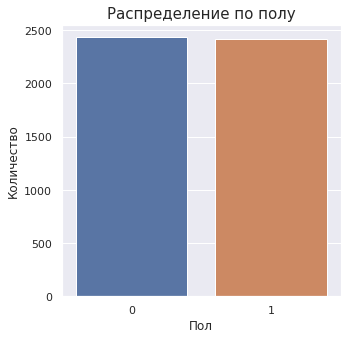

In [11]:
sns.set()
fig, ax = plt.subplots(figsize=(5, 5))
sns.countplot(x='sex', data=data)
ax.set_title('Распределение по полу', size=15)
plt.ylabel('Количество')
plt.xlabel('Пол')

Text(0.5, 0, 'Возраст клиента')

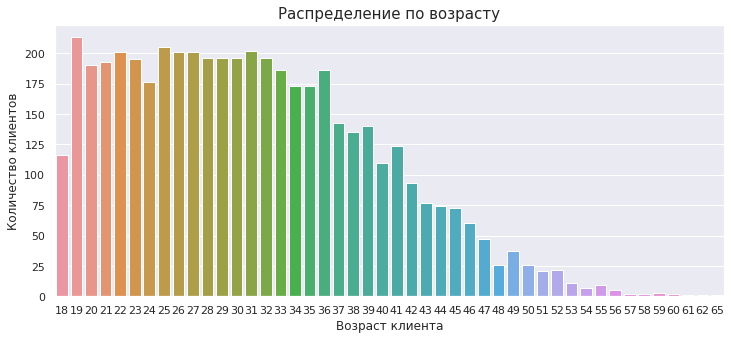

In [12]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.countplot(x='age', data=data)
ax.set_title('Распределение по возрасту', size=15)
plt.ylabel('Количество клиентов')
plt.xlabel('Возраст клиента')

Text(0, 0.5, 'Количество клиентов')

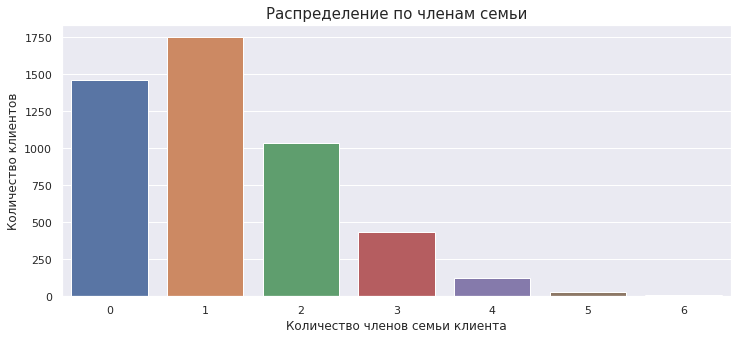

In [13]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.countplot(x='family_members', data=data)
ax.set_title('Распределение по членам семьи', size=15)
plt.xlabel('Количество членов семьи клиента')
plt.ylabel('Количество клиентов')

Text(0, 0.5, 'Количество клиентов')

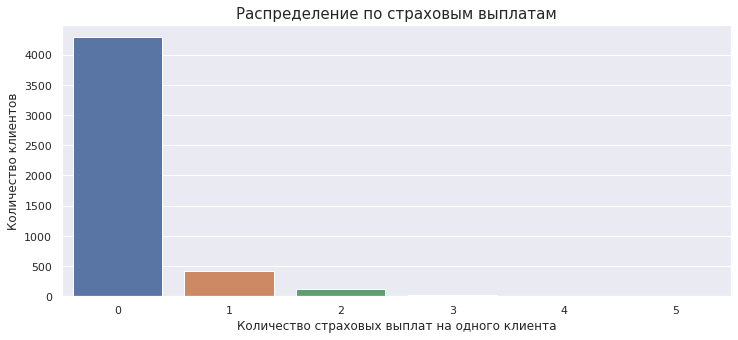

In [14]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.countplot(x='insurance_payments', data=data)
ax.set_title('Распределение по страховым выплатам', size=15)
plt.xlabel('Количество страховых выплат на одного клиента')
plt.ylabel('Количество клиентов')

Text(0.5, 0, 'Доход клиента')

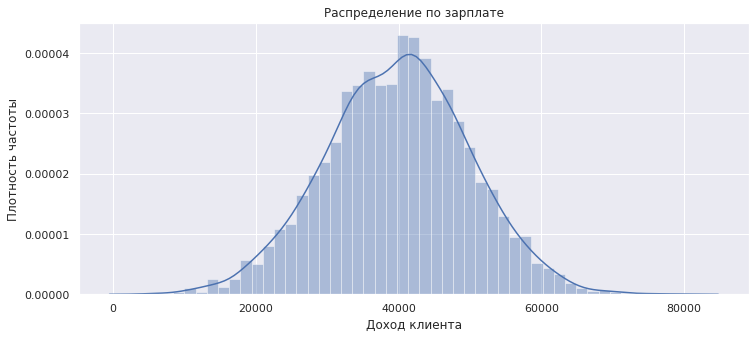

In [15]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.distplot(data['salary'])
ax.set_title('Распределение по зарплате')
plt.ylabel('Плотность частоты')
plt.xlabel('Доход клиента')

Проверим также корреляцию между признаками:

In [16]:
data.corr()

,sex,age,salary,family_members,insurance_payments
sex,1.000000,0.001953,0.015456,-0.007315,0.011565
age,0.001953,1.000000,-0.017386,-0.009064,0.654964
salary,0.015456,-0.017386,1.000000,-0.031687,-0.013123
family_members,-0.007315,-0.009064,-0.031687,1.000000,-0.039303
insurance_payments,0.011565,0.654964,-0.013123,-0.039303,1.000000


**Вывод:**

Рассмотрим полученную информацию.

Датасет data состоит из 5 столбцов (признаков) и 5000 строк (объектов). Пропущенные значения в датасете отсутствуют.

Все признаки - количественные. Признаки "пол", "члены семьи", "страховые выплаты" имеют целочисленный тип данных; признаки "возраст" и "зарплата" - вещественный.

Выполнены следующие преобразования данных:
<div><li>выполнена замена наименования столбцов латинским алфавитом;</li></div>
<div><li>исключены дубликаты из датасета;</li></div>
<div><li>в столбцах "age" и "salary" вещественный тип данных заменен на целочисленный.</li></div>
 
По результатам изечения признаков сделаны следующие выводы:
<div><li>присутствует корреляция 0.65 между признаками "age" и "insurance_payments";</li></div>
<div><li>количество клиентов мужского и женского пола приблизительно одинаково;</li></div>
<div><li>количество клиентов в возрасте от 19 до 36 лет сравнительно одинаково, после 36 лет количество клиентов постепенно снижается с увеличением возраста;</li></div>
<div><li>в основном, преобладают клиенты с одним членом семьи, на втором месте следуют "клиенты-одиночки";</li></div>
<div><li>подавляющее количество клиентов не имеет страховых выплат;</li></div>
<div><li>половина клиентов имеет доход от 33.2 до 46.6 тыс. рублей в месяц, средний доход - 40.2 тыс. рублей в месяц.</li></div>

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:** качество линейной регрессии не изменится.

**Обоснование:**

Новая матрица признаков получается умножением исходной $Х$ на рандомную($P$), формула предсказания примет вид:

$$
a = X P w
$$
Перепишем формулу нахождения весов $w'$:

$$
w' = ((XP)^T XP)^{-1} (XP)^T y
$$
Раскроем скобки:$$
w' = ((X^T P^T XP)^{-1} X^T P^T y
$$

$(P^T)^{-1} P^T$ - единичная матрица $E$. При умножении любой матрицы Р на единичную (или наоборот), получится эта же матрица Р, поэтому запись можно сократить:

$$
w' =  P^{-1}(X^T X)^{-1} X^T y
$$
Таким образом, новые веса $w'$ выражаются через исходные $w$ следующим образом:
$$
w' =  P^{-1} w
$$

**Вывод**

Параметры $w'$ изменились под новые значения, т.е. признаки исходной матрицы и преобразованной выражаются через коэффициенты(веса w), поэтому качество линейной регресии не изменится.

## Алгоритм преобразования

**Алгоритм**

<div>1. Cоздадим случайную матрицу A методом make_spd_matrix;</div>

<div>2. Методом np.linalg.inv() проверим матрицу А на обратимость и получим обратную матрицу.</div>

<div>3. Матрица А будет ключом кодирования. Умножим матрицу признаков X на полученную матрицу А и получим матрицу B с закодированными данными о клиентах:</div>

$$ B = X @ A $$

**Обоснование**

<div>Т.к. качество модели не изменится, если матрицу признаков умножать на обратимую модель, то такой алгоритм позволит защитить персональную информацию клиентов и не повлияет на работу модели.</div>

## Проверка алгоритма

### Преобразование данных

Разделим данные на признаки и целевой признак:

In [17]:
features = data.drop('insurance_payments', axis=1)
target = data['insurance_payments']

In [18]:
print('Признаки', features.shape)
print('Целевой признак', target.shape)

Признаки (4847, 4)
Целевой признак (4847,)


Создадим класс LinearRegression и напишем методы fit() и predict().
<div>Метод fit() примет на вход признаки и целевой признак, вернет веса w.</div>
<div>Метод predict() примет признаки, а вернёт предсказания.</div>

In [19]:
class LinearRegression:
    def fit(self, train_features, train_target):
        X = np.concatenate((np.ones((train_features.shape[0], 1)), train_features), axis=1)
        y = train_target
        w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
        self.w = w[1:]
        self.w0 = w[0]

    def predict(self, test_features):
        return test_features.dot(self.w) + self.w0

Создадим модель, сохраним её в переменной model и обучим. Найдем её предсказания на обучающей выборке и сохраним их в переменной predictions. Напечатаем на экране веса и значение метрики R2. Она вычисляется по MSE.

In [20]:
model = LinearRegression()
model.fit(features, target)
predictions = model.predict(features)
print(r2_score(target, predictions))

0.4302010046633358


Создадим матрицу признаков:

In [21]:
features_matrix = features.values
features_matrix

array([[    1,    41, 49600,     1],
       [    0,    46, 38000,     1],
       [    0,    29, 21000,     0],
       ...,
       [    0,    20, 33900,     2],
       [    1,    22, 32700,     3],
       [    1,    28, 40600,     1]])

Создадим случайную матрицу методом make_spd_matrix, размером по количеству столбцов features:

In [22]:
random_matrix = make_spd_matrix(n_dim=4, random_state=123)
random_matrix

array([[ 0.47243659,  0.36201499,  0.23624413, -0.20756552],
       [ 0.36201499,  3.26723888,  1.70966795, -0.39838002],
       [ 0.23624413,  1.70966795,  1.32704651, -0.17893753],
       [-0.20756552, -0.39838002, -0.17893753,  0.35460046]])

Проверим созданную случайную матрицу на обратимость:

In [23]:
np.linalg.inv(random_matrix)

array([[ 2.97675307,  0.09601407, -0.43363796,  1.63149048],
       [ 0.09601407,  1.02415391, -1.2595126 ,  0.57122764],
       [-0.43363796, -1.2595126 ,  2.39108163, -0.46226306],
       [ 1.63149048,  0.57122764, -0.46226306,  4.18355526]])

При скалярном умножении исходной матрицы на обратную, должна получиться единичная матрица:

In [24]:
random_matrix @ np.linalg.inv(random_matrix)

array([[ 1.00000000e+00, -4.34368061e-18,  4.90850932e-17,
         9.04884693e-18],
       [-1.76502391e-16,  1.00000000e+00,  2.98740156e-16,
         1.55106407e-16],
       [ 1.72841510e-17,  1.11816741e-16,  1.00000000e+00,
         9.24801154e-17],
       [ 8.21978570e-17,  1.33358218e-17,  3.30120090e-17,
         1.00000000e+00]])

Матрицу признаков умножим на обратимую матрицу random_matrix:

In [25]:
encoded_features = features_matrix @ random_matrix
encoded_features

array([[11732.81637505, 84933.45064883, 65891.66076973, -8891.48812605],
       [ 8993.72209566, 65117.27663171, 50506.23330695, -6817.59709104],
       [ 4971.62518218, 35997.77683511, 27917.55715724, -3769.24118958],
       ...,
       [ 8015.50120409, 58022.29145405, 45020.71229678, -6073.24072949],
       [ 7732.99714812, 55977.18802921, 43431.73312289, -5859.16541635],
       [ 9601.91300269, 69503.96501156, 53926.01646352, -7275.87139908]])

### Обучение модели

**Обучение модели на исходных данных**

Разделим исходные данные на обучающую и валидационную выборки:

In [26]:
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, train_size=0.75, test_size=0.25, random_state=123)

In [27]:
print('features_train:', features_train.shape) 
print('target_train:', target_train.shape)

print('features_valid:', features_valid.shape)
print('target_valid:', target_valid.shape)

features_train: (3635, 4)
target_train: (3635,)
features_valid: (1212, 4)
target_valid: (1212,)


Обучим модель линейной регрессии и посчитаем метрику качества R2:

In [28]:
model = LinearRegression()
model.fit(features_train, target_train)
predictions = model.predict(features_valid)
r2 = r2_score(target_valid, predictions)
print('Метрика R2 до преобразования данных:', r2)

Метрика R2 до преобразования данных: 0.4097895814653213


**Обучение модели на преобразованных данных**

Проверим, что качество линейной регрессии из sklearn не отличается до и после преобразования:

In [29]:
features_train_encoded, features_valid_encoded, target_train_encoded, target_valid_encoded = train_test_split(
    encoded_features, target, train_size=0.75, test_size=0.25, random_state=123)

In [30]:
print('features_train_encoded:', features_train_encoded.shape) 
print('target_train_encoded:', target_train_encoded.shape)

print('features_valid_encoded:', features_valid_encoded.shape)
print('target_valid_encoded', target_valid_encoded.shape)

features_train_encoded: (3635, 4)
target_train_encoded: (3635,)
features_valid_encoded: (1212, 4)
target_valid_encoded (1212,)


In [31]:
model_encoded = LinearRegression()
model_encoded.fit(features_train_encoded, target_train_encoded)
predictions_encoded = model_encoded.predict(features_valid_encoded)
r2_encoded = r2_score(target_valid_encoded, predictions_encoded)
print('Метрика R2 после преобразования данных:', r2_encoded)

Метрика R2 после преобразования данных: 0.40978958087622175


**Вывод**

Метрика R2 до преобразования данных: 0.4097895814653213

Метрика R2 после преобразования данных: 0.40978958087622175

Значения метрик R2 до и после преобразования одинаково, это означает, что качество модели линейной регрессии после преобразования данных не изменилось.

## Общий вывод

В данной проектной работе на основании предоставленных данных разработан алгоритм для защиты данных клиентов страховой компании «Хоть потоп».

Выполнены следующие этапы:

<li>на первом этапе загружены и изучены данные, выполнена предобработка признаков, построены графики распредлеления признаков.</li>

<li>на втором этапе обосновано, почему качество линейной регрессии не изменяется при умножении признаков на обратимую матрицу.</li>

<li>на третьем этапе предложен и обоснован алгоритм преобразования данных для решения задачи.</li>

<li>на четвертом этапе запрограммирован алгоритм с применением матричных операций. Проверено, что качество линейной регрессии из sklearn не отличается до и после преобразования.</li>